In [130]:
import pandas as pd
from IPython.display import display
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from sklearn.metrics import f1_score
from pgmpy.estimators import HillClimbSearch

# 设置matplotlib的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# Step 1 : 数据预处理

a. 缺失值：数据集完整无缺失

b. 数据类型：所有变量都是连续数值型

c. 标准化/归一化：由于各变量量纲不同，进行标准化处理

In [131]:
data = pd.read_csv('shujv_origin.csv')

## _1-1 查看数据的信息_

In [132]:
# 查看数据前5行
display(data.head())

,硝化棉（g）,硝化甘油（kg）,中定剂（g）,凡士林（g）,吉钠（kg）,HMX（kg）,铝（kg）,铅盐（kg）,铜盐（g）,CB（g）,...,辊筒间距,加料速度,滚筒直径,滚筒长度,压延次数,滚筒速度,沟槽形式,燃速,驱水率,力学性能
0,727,49.69,578,422,6.16,10.9,4.78,4.94,430,492,...,6.6,97,103,143,5,9.8,5,6.1,3.52,5017
1,736,49.62,587,426,6.32,10.8,4.63,5.05,434,497,...,6.5,97,103,145,5,9.8,5,6.2,3.50,5016
2,773,60.28,592,422,10.16,12.9,5.03,7.97,445,513,...,7.6,101,108,152,9,14.3,8,10.6,5.32,5017
3,713,51.53,550,410,5.97,13.2,6.95,4.91,427,486,...,7.5,98,101,139,7,11.7,5,6.3,4.21,5022
4,775,59.20,593,423,9.70,12.3,4.76,7.91,457,522,...,7.6,99,106,158,8,13.1,8,9.8,4.90,5016


In [133]:
display("数据基本信息:")
display(data.info())

'数据基本信息:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   硝化棉（g）    120 non-null    int64  
 1   硝化甘油（kg）  120 non-null    float64
 2   中定剂（g）    120 non-null    int64  
 3   凡士林（g）    120 non-null    int64  
 4   吉钠（kg）    120 non-null    float64
 5   HMX（kg）   120 non-null    float64
 6   铝（kg）     120 non-null    float64
 7   铅盐（kg）    120 non-null    float64
 8   铜盐（g）     120 non-null    int64  
 9   CB（g）     120 non-null    int64  
 10  镍（g）      120 non-null    int64  
 11  工艺温度      120 non-null    int64  
 12  辊筒间距      120 non-null    float64
 13  加料速度      120 non-null    int64  
 14  滚筒直径      120 non-null    int64  
 15  滚筒长度      120 non-null    int64  
 16  压延次数      120 non-null    int64  
 17  滚筒速度      120 non-null    float64
 18  沟槽形式      120 non-null    int64  
 19  燃速        120 non-null    float64
 20  驱水率       120 non-null    float6

None

In [134]:
display('描述性统计:')
display(data.describe())

'描述性统计:'

,硝化棉（g）,硝化甘油（kg）,中定剂（g）,凡士林（g）,吉钠（kg）,HMX（kg）,铝（kg）,铅盐（kg）,铜盐（g）,CB（g）,...,辊筒间距,加料速度,滚筒直径,滚筒长度,压延次数,滚筒速度,沟槽形式,燃速,驱水率,力学性能
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,...,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,723.566667,48.335500,535.166667,386.150000,8.159500,12.155000,7.297083,7.520750,397.216667,478.100000,...,7.476667,98.941667,100.283333,133.758333,8.708333,13.093333,7.033333,8.790833,7.121833,5023.641667
std,48.764695,6.934565,42.046659,35.782877,2.596328,3.136954,2.176982,2.718154,35.141056,40.117558,...,3.202041,13.131075,13.502059,17.887133,2.356453,3.407104,2.669256,3.443298,2.552461,3.102712
min,623.000000,32.520000,447.000000,325.000000,4.360000,5.500000,3.700000,3.420000,337.000000,405.000000,...,3.400000,80.000000,72.000000,103.000000,4.000000,5.800000,4.000000,3.600000,3.250000,5013.000000
25%,684.750000,43.387500,501.000000,355.000000,6.310000,10.075000,5.487500,5.405000,369.000000,448.750000,...,5.000000,89.000000,91.750000,120.000000,7.000000,10.700000,5.000000,6.300000,5.072500,5022.000000
50%,720.500000,47.640000,530.000000,382.500000,7.555000,11.950000,6.760000,7.260000,393.500000,469.000000,...,6.650000,97.000000,100.500000,133.000000,9.000000,12.650000,6.000000,8.250000,6.495000,5024.500000
75%,764.000000,52.647500,571.250000,407.750000,9.805000,13.875000,8.827500,8.970000,422.500000,501.500000,...,9.000000,104.000000,107.250000,143.250000,10.000000,15.050000,8.000000,10.600000,8.965000,5026.000000
max,822.000000,68.290000,627.000000,474.000000,14.920000,20.900000,12.300000,17.990000,473.000000,584.000000,...,18.700000,137.000000,132.000000,172.000000,15.000000,21.700000,17.000000,21.500000,13.150000,5027.000000


## _1-2 检查缺失值_

In [135]:
display("缺失值统计:")
print(data.isnull().sum())
# 无缺失值

'缺失值统计:'

硝化棉（g）      0
硝化甘油（kg）    0
中定剂（g）      0
凡士林（g）      0
吉钠（kg）      0
HMX（kg）     0
铝（kg）       0
铅盐（kg）      0
铜盐（g）       0
CB（g）       0
镍（g）        0
工艺温度        0
辊筒间距        0
加料速度        0
滚筒直径        0
滚筒长度        0
压延次数        0
滚筒速度        0
沟槽形式        0
燃速          0
驱水率         0
力学性能        0
dtype: int64


## _1-3 标准化_

用于对数据进行标准化处理。标准化是将数据转换为均值为0、标准差为1的分布

（ 归一化 Verus 标准化 ： 谁的效果会更好些？ ）

In [136]:
# 提取特征名称
features = data.columns.tolist()
# 标准化数据
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=features)

# 查看标准化后的数据
display("标准化后的数据样本:")
display(data_scaled.head())

'标准化后的数据样本:'

,硝化棉（g）,硝化甘油（kg）,中定剂（g）,凡士林（g）,吉钠（kg）,HMX（kg）,铝（kg）,铅盐（kg）,铜盐（g）,CB（g）,...,辊筒间距,加料速度,滚筒直径,滚筒长度,压延次数,滚筒速度,沟槽形式,燃速,驱水率,力学性能
0,0.070701,0.196145,1.022981,1.006077,-0.773355,-0.401747,-1.161074,-0.953431,0.936818,0.347934,...,-0.274932,-0.148488,0.202048,0.518832,-1.580291,-0.970661,-0.764954,-0.784746,-1.417038,-2.149576
1,0.256035,0.186008,1.237926,1.118331,-0.711471,-0.433759,-1.230266,-0.912792,1.051123,0.473091,...,-0.306293,-0.148488,0.202048,0.631113,-1.580291,-0.970661,-0.764954,-0.755583,-1.424907,-2.473226
2,1.017962,1.729680,1.357340,1.006077,0.773742,0.238487,-1.045755,0.165971,1.365459,0.873591,...,0.038679,0.157410,0.573914,1.024097,0.124293,0.355647,0.363667,0.527620,-0.708880,-2.149576
3,-0.217595,0.462595,0.354262,0.669315,-0.846842,0.334522,-0.160102,-0.964514,0.851090,0.197747,...,0.007318,-0.072014,0.053301,0.294270,-0.727999,-0.410664,-0.764954,-0.726419,-1.145578,-0.531326
4,1.059147,1.573286,1.381223,1.034140,0.595826,0.046417,-1.170299,0.143804,1.708372,1.098872,...,0.038679,0.004461,0.425167,1.360940,-0.301853,0.001965,0.363667,0.294310,-0.874117,-2.473226


## _1-4 箱线图 检查&处理 异常值_

绘制箱线图来可视化异常值，并使用四分位数范围（IQR）方法来识别和处理这些异常值。

箱线图可以直观地显示数据的分布情况，包括：中位数、四分位数、异常值等

d:\my_conda_envs\PGM\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


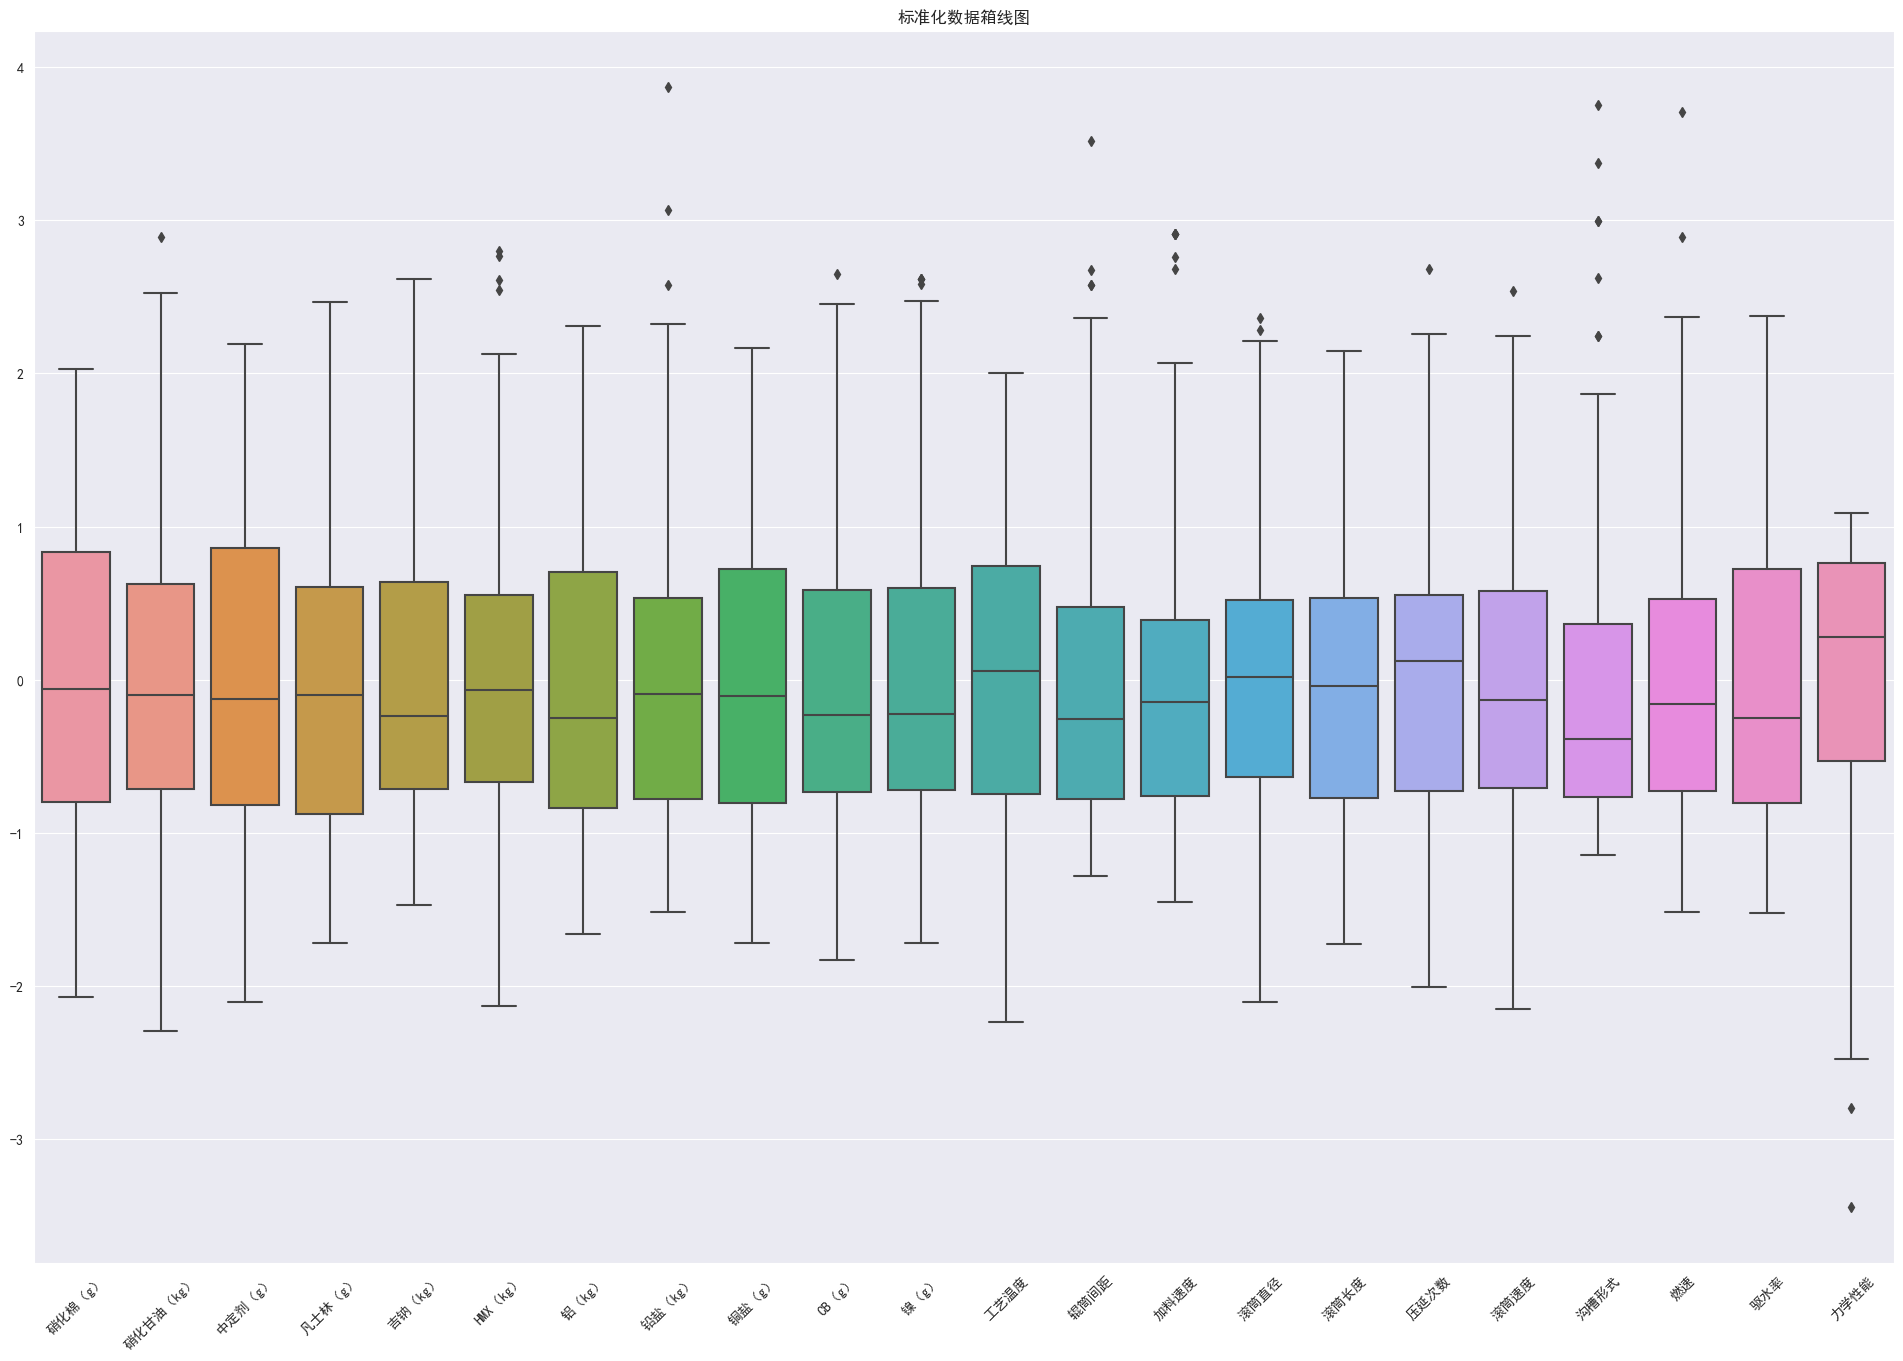

In [137]:
# 绘制箱线图检查异常值
plt.figure(figsize=(24, 16))  # 图形的大小为24英寸宽和16英寸高
sns.boxplot(data=data_scaled)  # 用Seaborn库绘制箱线图
plt.xticks(rotation=45)  # x轴的标签旋转45度，避免标签重叠，便于阅读
plt.title("标准化数据箱线图")  # 图形的标题
plt.show()

# 可以选择处理异常值
# 例如用上下限替换异常值
for column in data_scaled.columns:
    q1 = data_scaled[column].quantile(0.25)  # 计算第一四分位数（Q1）
    q3 = data_scaled[column].quantile(0.75)  # 计算第三四分位数（Q3）
    iqr = q3 - q1  # 计算四分位数范围（IQR）
    lower_bound = q1 - 1.5 * iqr  # 计算下界
    upper_bound = q3 + 1.5 * iqr  # 计算上界
    
    # 对当前列的每个值进行处理
    # 匿名函数，用于将小于下界的值替换为下界，将大于上界的值替换为上界，其他值保持不变
    data_scaled[column] = data_scaled[column].apply(
        lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
    )

>### Caption 1：箱线图怎么看？
>> 箱线图的中间的横线表示中位数（Q2）;  
箱子的上下边界分别表示第一四分位数（Q1）和第三四分位数（Q3）;  
箱子的长度（IQR）表示四分位数范围，即 IQR=Q3−Q1;  
箱线图的“胡须”表示正常范围内的数据，通常定义为 Q1−1.5×IQR 和 Q3+1.5×IQR;  
超出“胡须”范围的点被认为是异常值。


## _1-5 相关性分析_
在进行结构学习前，可以先看看变量间的相关性：

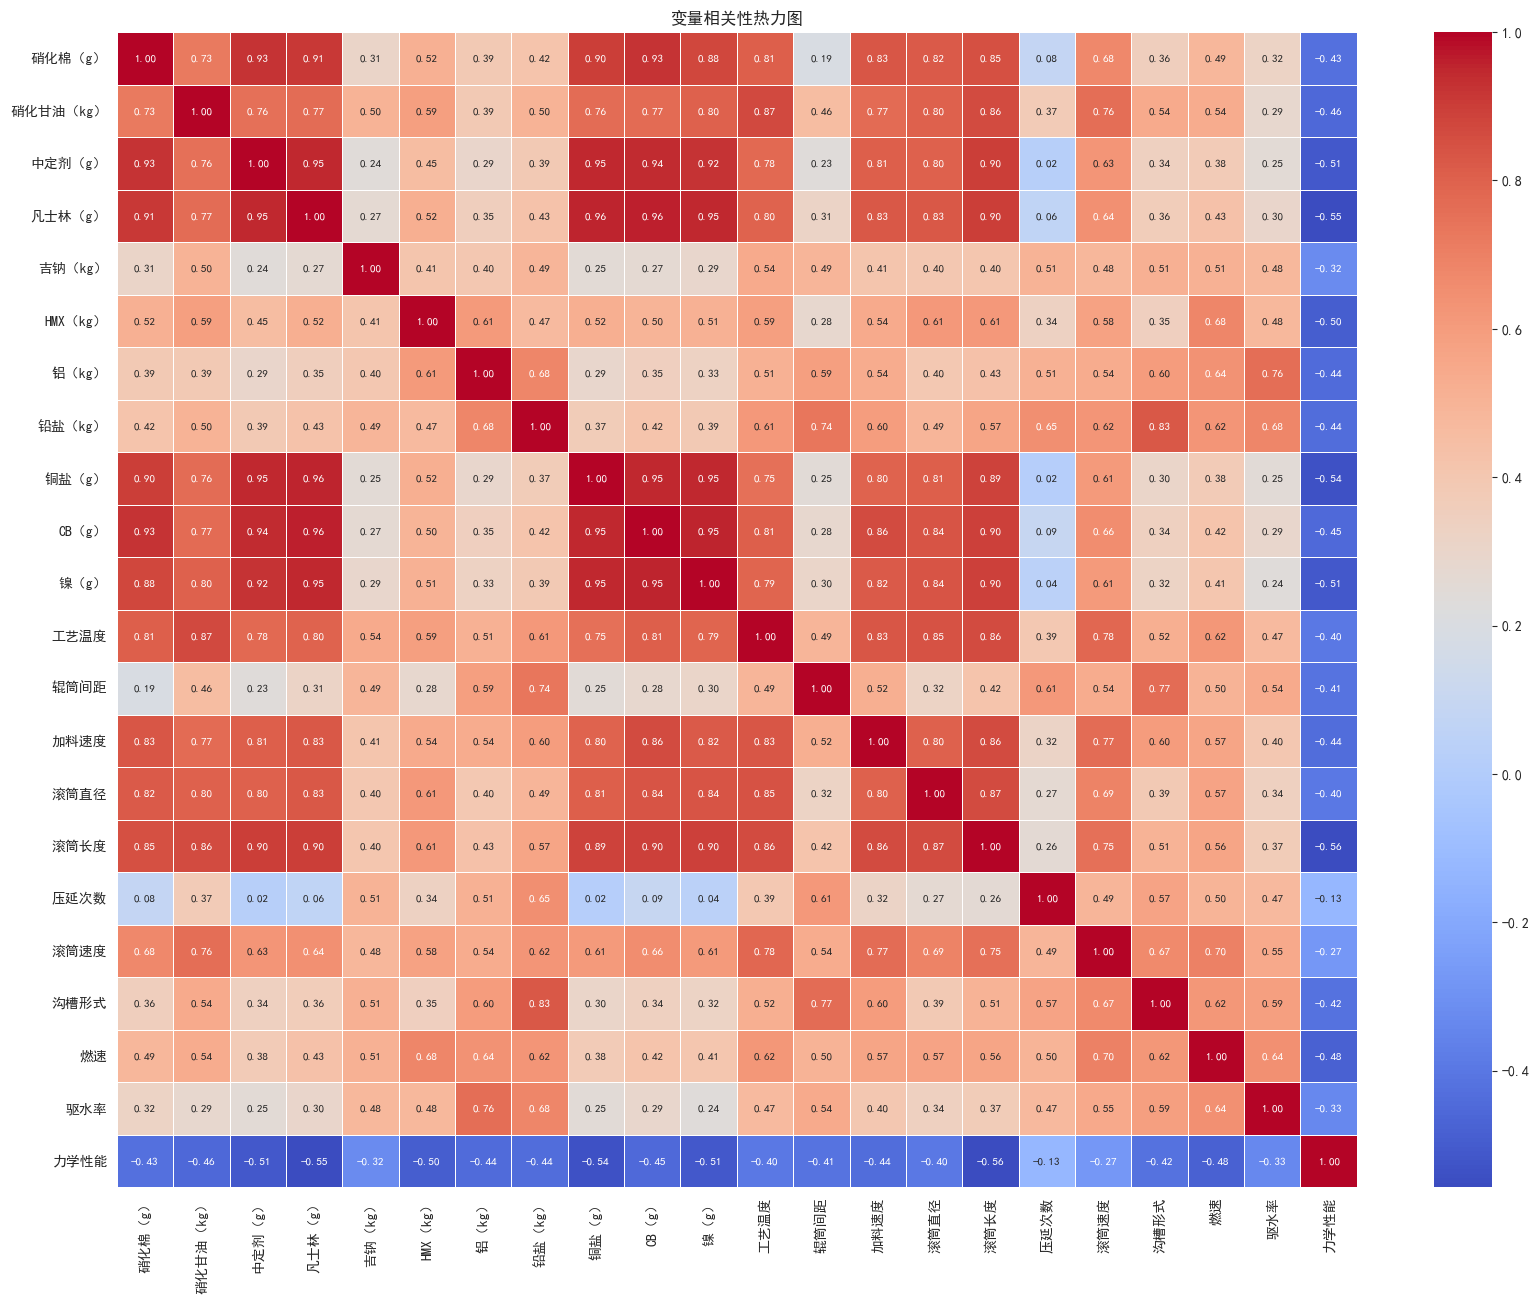

In [138]:
# 计算相关系数矩阵
corr_matrix = data_scaled.corr()

# 绘制热力图
plt.figure(figsize=(20, 15))  # 设置图形的大小为20x15英寸
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            annot_kws={"size": 8}, linewidths=0.5)
"""
使用Seaborn绘制热力图:
    corr_matrix : 输入的相关系数矩阵;
    annot=True : 在热力图的每个单元格中显示相关系数的值;
    fmt=".2f" : 将相关系数值格式化为小数点后两位;
    cmap='coolwarm' : 指定颜色映射方案为coolwarm;
    annot_kws={"size": 8} : 设置注释文本的字体大小为8;
    linewidths=0.5 : 设置单元格之间的分隔线宽度为0.5;
"""
plt.title("变量相关性热力图")  # 设置图形的标题
plt.show()

>#### Caption 2：相关系数矩阵怎么看？
>> 相关系数矩阵是一个对称矩阵，其中对角线上的值为1（表示变量与自身的相关性）;  
非对角线上的值表示不同变量之间的相关性;    
颜色越暖（红色）表示相关性越强，颜色越冷（蓝色）表示相关性越弱;

## _1-6 将变量名变成英文（否则画贝叶斯网络图时会报错）_

In [139]:
data = data_scaled

# 定义变量名映射
variable_mapping = {
    '硝化棉（g）': 'Nitrocellulose_g',
    '硝化甘油（kg）': 'Nitroglycerin_kg',
    '中定剂（g）': 'Stabilizer_g',
    '凡士林（g）': 'Vaseline_g',
    '吉钠（kg）': 'Sodium_kg',
    'HMX（kg）': 'HMX_kg',
    '铝（kg）': 'Aluminum_kg',
    '铅盐（kg）': 'LeadSalt_kg',
    '铜盐（g）': 'CopperSalt_g',
    'CB（g）': 'CB_g',
    '镍（g）': 'Nickel_g',
    '工艺温度': 'ProcessTemperature',
    '辊筒间距': 'RollerSpacing',
    '加料速度': 'FeedingSpeed',
    '滚筒直径': 'RollerDiameter',
    '滚筒长度': 'RollerLength',
    '压延次数': 'PressingTimes',
    '滚筒速度': 'RollerSpeed',
    '沟槽形式': 'GrooveForm',
    '燃速': 'BurnRate',
    '驱水率': 'WaterRepellencyRate',
    '力学性能': 'MechanicalProperties'
}

# 修改变量名
data.rename(columns=variable_mapping, inplace=True)

# 保存修改后的数据
output_file_path = 'processed_data_renamed.csv'
data.to_csv(output_file_path, index=False)

print(f"变量名已修改并保存到文件：{output_file_path}")

display( data.head() )

变量名已修改并保存到文件：processed_data_renamed.csv


,Nitrocellulose_g,Nitroglycerin_kg,Stabilizer_g,Vaseline_g,Sodium_kg,HMX_kg,Aluminum_kg,LeadSalt_kg,CopperSalt_g,CB_g,...,RollerSpacing,FeedingSpeed,RollerDiameter,RollerLength,PressingTimes,RollerSpeed,GrooveForm,BurnRate,WaterRepellencyRate,MechanicalProperties
0,0.070701,0.196145,1.022981,1.006077,-0.773355,-0.401747,-1.161074,-0.953431,0.936818,0.347934,...,-0.274932,-0.148488,0.202048,0.518832,-1.580291,-0.970661,-0.764954,-0.784746,-1.417038,-2.149576
1,0.256035,0.186008,1.237926,1.118331,-0.711471,-0.433759,-1.230266,-0.912792,1.051123,0.473091,...,-0.306293,-0.148488,0.202048,0.631113,-1.580291,-0.970661,-0.764954,-0.755583,-1.424907,-2.473226
2,1.017962,1.729680,1.357340,1.006077,0.773742,0.238487,-1.045755,0.165971,1.365459,0.873591,...,0.038679,0.157410,0.573914,1.024097,0.124293,0.355647,0.363667,0.527620,-0.708880,-2.149576
3,-0.217595,0.462595,0.354262,0.669315,-0.846842,0.334522,-0.160102,-0.964514,0.851090,0.197747,...,0.007318,-0.072014,0.053301,0.294270,-0.727999,-0.410664,-0.764954,-0.726419,-1.145578,-0.531326
4,1.059147,1.573286,1.381223,1.034140,0.595826,0.046417,-1.170299,0.143804,1.708372,1.098872,...,0.038679,0.004461,0.425167,1.360940,-0.301853,0.001965,0.363667,0.294310,-0.874117,-2.473226


# Step2 : 结构学习方法

### _2-1 特征筛选原理_
特征筛选的目的是通过相关性分析，保留与目标变量（如燃速、力学性能）显著相关的特征，减少无关或冗余变量对模型学习的干扰。其核心原理基于以下两点:
> 相关性驱动：与目标变量相关性强的特征更可能包含有效信息;
>
> 维度灾难缓解：减少变量数量可降低贝叶斯网络结构学习的复杂度

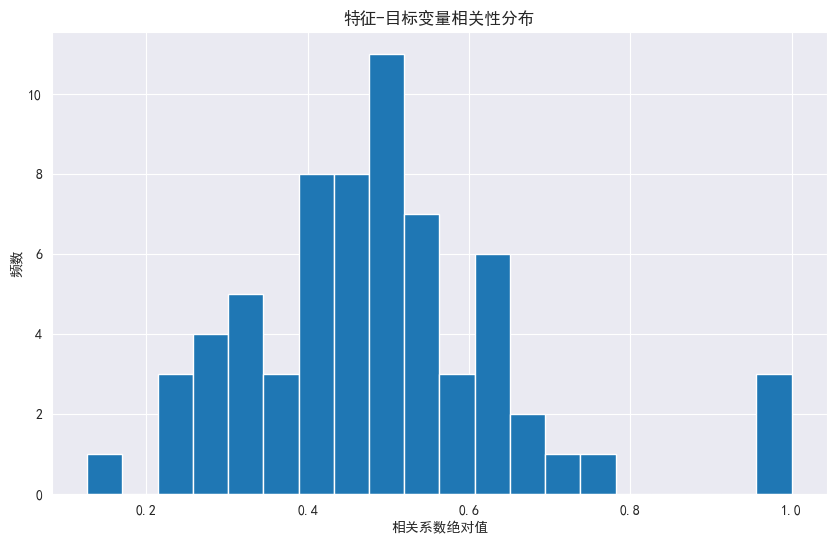

In [140]:
data = pd.read_csv('processed_data_renamed.csv')  # 加载预处理后的数据
# 数据已完成标准化（均值为0，方差为1）

targets = ["BurnRate", "MechanicalProperties", "WaterRepellencyRate"]  # 目标性能指标

# 绘制相关性分布直方图
plt.figure(figsize=(10,6))
data.corr()[targets].abs().stack().hist(bins=20)
""" 
data.corr(): 计算所有数值列之间的Pearson相关系数矩阵
[targets]：筛选目标变量列
.stack()：展开为单列
.hist(bins=20): 将数据划分为20个区间(bins)，绘制频数分布直方图
    X轴: 相关系数绝对值(0-1)
    Y轴: 落在该区间的相关系数数量
"""
plt.xlabel('相关系数绝对值')
plt.ylabel('频数')
plt.title('特征-目标变量相关性分布')
plt.show()

In [141]:
corr_threshold = 0.6  # 相关性阈值
""" 
初始: 0.3
若模型性能不足（如预测误差大），降低阈值;
若模型计算过慢，提高阈值。
"""
relevant_cols = set()  # 存储筛选后的特征

# 筛选与目标变量相关性>0.25的特征
for target in targets:
    corr = data.corr()[target].abs()  # 计算绝对值相关系数
    relevant_cols.update(corr[corr > corr_threshold].index.tolist())  # 收集相关特征

data = data[list(relevant_cols)]  # 保留相关特征

print(f"筛选后的特征数: {len(data.columns)}")
display(data.head())  # 打印剩余特征数量

筛选后的特征数: 9


,ProcessTemperature,MechanicalProperties,HMX_kg,LeadSalt_kg,WaterRepellencyRate,Aluminum_kg,RollerSpeed,BurnRate,GrooveForm
0,-0.633139,-2.149576,-0.401747,-0.953431,-1.417038,-1.161074,-0.970661,-0.784746,-0.764954
1,-0.633139,-2.473226,-0.433759,-0.912792,-1.424907,-1.230266,-0.970661,-0.755583,-0.764954
2,0.971195,-2.149576,0.238487,0.165971,-0.708880,-1.045755,0.355647,0.527620,0.363667
3,-0.289353,-0.531326,0.334522,-0.964514,-1.145578,-0.160102,-0.410664,-0.726419,-0.764954
4,0.856600,-2.473226,0.046417,0.143804,-0.874117,-1.170299,0.001965,0.294310,0.363667


In [142]:
def showBN(model, save=False):
    '''传入BayesianModel对象，调用graphviz绘制结构图，jupyter中可直接显示'''
    from graphviz import Digraph
    node_attr = dict(
     style='filled',
     shape='box',
     align='left',
     fontsize='12',
     ranksep='0.1',
     height='0.2'
    )
    dot = Digraph(node_attr=node_attr, graph_attr=dict(size="12,12"))
    seen = set()
    edges=model.edges()
    for a,b in edges:
        dot.edge(a,b)
    if save:
        dot.view(cleanup=True)
    return dot

### _2-2 定义 f1分数_

In [143]:
# Function to evaluate the learned model structures.
def get_f1_score(estimated_model, true_model):
    nodes = estimated_model.nodes()
    est_adj = nx.to_numpy_array(
        estimated_model.to_undirected(), nodelist=nodes, weight=None
    )
    true_adj = nx.to_numpy_array(
        true_model.to_undirected(), nodelist=nodes, weight=None
    )

    f1 = f1_score(np.ravel(true_adj), np.ravel(est_adj))
    print("F1-score for the model skeleton: ", f1)

In [144]:
# Learning the continuous variable ecoli model back

est = HillClimbSearch(data=data)
estimated_model = est.estimate(max_indegree=4, max_iter=int(1e4))  # scoring_method="bic-g"

  0%|          | 14/10000 [00:51<10:08:43,  3.66s/it]


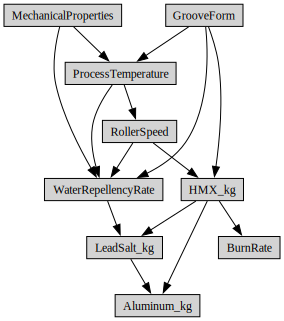

In [145]:
showBN( estimated_model )